<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('music_data.csv')

In [9]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [23]:
data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     1
harmony_mean               1
harmony_var                1
perceptr_mean              1
perceptr_var               1
tempo                      1
mfcc1_mean                 1
mfcc1_var                  1
mfcc2_mean                 1
mfcc2_var                  1
mfcc3_mean                 1
mfcc3_var                  1
mfcc4_mean                 1
mfcc4_var                  1
mfcc5_mean                 1
mfcc5_var                  1
mfcc6_mean                 1
mfcc6_var                  1
mfcc7_mean                 1
mfcc7_var                  1
mfcc8_mean                 1
mfcc8_var     

In [24]:
data=data.dropna(axis=0,how='any')

In [25]:
data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [26]:
X=data.drop(columns="filename",axis=1)
X=X.drop(columns="length",axis=1)
X=X.drop(columns="label",axis=1)

In [27]:
Y=data["label"]

In [ ]:
#One-hot encoding the target variables

In [28]:
Y_labeled=pd.get_dummies(Y)

In [29]:
Y_labeled.head()

,blues,classical,country,disco
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
#Creating dataframe to store labels

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
sc=MinMaxScaler()


In [32]:
#Splitting train and test datasets
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_labeled,test_size=0.2)

In [34]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [40]:
X_train.shape[1]

57

In [51]:
model=Sequential([
                  Dense(units=128,input_shape=(57,),activation='relu'),
                  Dense(units=64,activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=4,activation='softmax')
])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               7424      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 4)                 132       
                                                                 
Total params: 17,892
Trainable params: 17,892
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(x=X_train,y=Y_train,validation_split=0.2,batch_size=20,epochs=100,shuffle=True,verbose=2)

Epoch 1/100
121/121 - 3s - loss: 1.3293 - accuracy: 0.3878 - val_loss: 1.2735 - val_accuracy: 0.5075 - 3s/epoch - 22ms/step
Epoch 2/100
121/121 - 1s - loss: 1.1818 - accuracy: 0.5968 - val_loss: 1.1212 - val_accuracy: 0.6003 - 664ms/epoch - 5ms/step
Epoch 3/100
121/121 - 1s - loss: 0.9998 - accuracy: 0.6387 - val_loss: 0.9468 - val_accuracy: 0.6501 - 516ms/epoch - 4ms/step
Epoch 4/100
121/121 - 1s - loss: 0.8538 - accuracy: 0.6765 - val_loss: 0.8415 - val_accuracy: 0.6750 - 586ms/epoch - 5ms/step
Epoch 5/100
121/121 - 1s - loss: 0.7669 - accuracy: 0.7051 - val_loss: 0.7738 - val_accuracy: 0.6965 - 574ms/epoch - 5ms/step
Epoch 6/100
121/121 - 0s - loss: 0.7067 - accuracy: 0.7287 - val_loss: 0.7227 - val_accuracy: 0.7181 - 445ms/epoch - 4ms/step
Epoch 7/100
121/121 - 1s - loss: 0.6593 - accuracy: 0.7383 - val_loss: 0.6808 - val_accuracy: 0.7231 - 602ms/epoch - 5ms/step
Epoch 8/100
121/121 - 1s - loss: 0.6213 - accuracy: 0.7507 - val_loss: 0.6541 - val_accuracy: 0.7479 - 611ms/epoch - 5ms

In [49]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=7d9add15a2c6d53e9b22c7a6d222e6627ffe94476933f5b785c620e77fd6966c
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=c1e32116bc94e157663ee6b48d51550a25911ee982a4ac4bfb998a223e10aa57
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=9a8dfca843cdb3dfc23d9cc9856c5338c99117b40941736299218ed198de9a6a
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [50]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

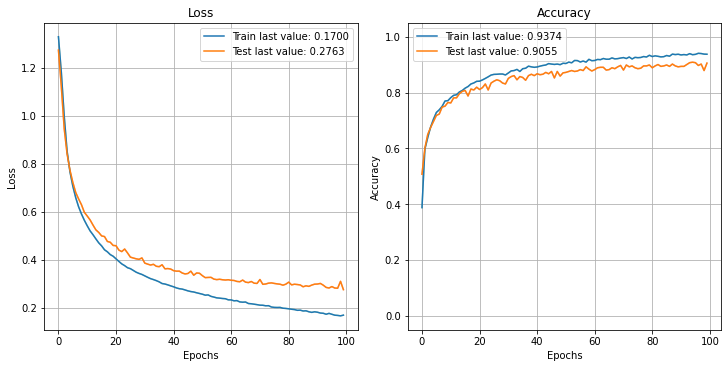

In [56]:
plot_history(history)
plt.show()

In [ ]:
#Testing on test dataset

In [58]:
model.evaluate(x=X_test,y=Y_test,batch_size=20,verbose=2)

38/38 - 0s - loss: 0.2112 - accuracy: 0.9337 - 99ms/epoch - 3ms/step


[0.2111518383026123, 0.9336870312690735]